In [1]:
from core.nuum import NuumActions, rnd_sleep
from service.browser import Browser 
import random
from core.viz import viz_log
import pandas as pd


# NuumBot

### Запускаем браузер и вручную авторизуемся в Nuum

In [8]:
"""Запускаем браузер и вручную авторизуемся в Nuum"""
browser = Browser()
nuum = NuumActions(browser)

In [9]:
#browser.save_cookies()
browser.load_cookies()

### Запуск бота в цикле
Бот будет просматривать ленту рекомендаций и подписок поочередно


In [4]:
"""Функция запуска бота в цикле"""

def run_bot(nuum, N, skip_ratio, mode='rec', log=None, c=0, subscribe_ratio=0, pause=1):   
    """ Запуск бота в цикле
    
    Args:
        nuum: NuumActions
        N: int - количество клипов
        skip_ratio: float - вероятность пропуска клипа
        mode: str - 'rec' - рекомендации, 'subs' - подписки
        log: pd.DataFrame - лог
        c: int - номер цикла
        subscribe_ratio: float - вероятность подписки на канал
    """
    if log is None:
        log = pd.DataFrame(columns=['name', 'like', 'sticker', 'subscribe', 'mode', 'time'])
    
    open_page = {'rec': nuum.open_rec, 'subs': nuum.open_subs}
    open_page[mode]()   
    i = 0
    while i < N:        
        if skip_ratio < random.random():
            rnd_sleep()
            result = nuum.like_sticker_subscribe(
                like_ratio = 1, 
                sticker_ratio = 1, 
                subscribe_ratio = subscribe_ratio
            )
            if result:
                result['mode'] = mode
                new_record = pd.DataFrame([result])
                log.loc[len(log)] = new_record.loc[0]
                if log.time.dtype != '<M8[ns]':
                    log.time = pd.to_datetime(log.time)
                viz_log(log, i+1, N, c, mode)
                i += 1
                
            rnd_sleep(pause,3)
        
        if nuum.find_by_text('Комментарии') is None:
            break
                
        rnd_sleep(.5)
        nuum.next()
        

Рекоммендации
Всего: 0, лайкнул: 0, стикер: 0, подписался:0

Подписчики  цикл 1: (29/500)
Всего: 29, лайкнул: 29, стикер: 20, подписался:0
egorfiq, lapa_tigra, BESTMIXCHANNEL, P, TvPyatnitsa, nadin1, egorfiq, egorfiq, blatosphera_crew, blatosphera_crew, blatosphera_crew, blatosphera_crew, OBZOR_NAHODOK, blatosphera_crew, Breeskunikade, ChatGPT4, ChatGPT4, A, ChatGPT4, ChatGPT4


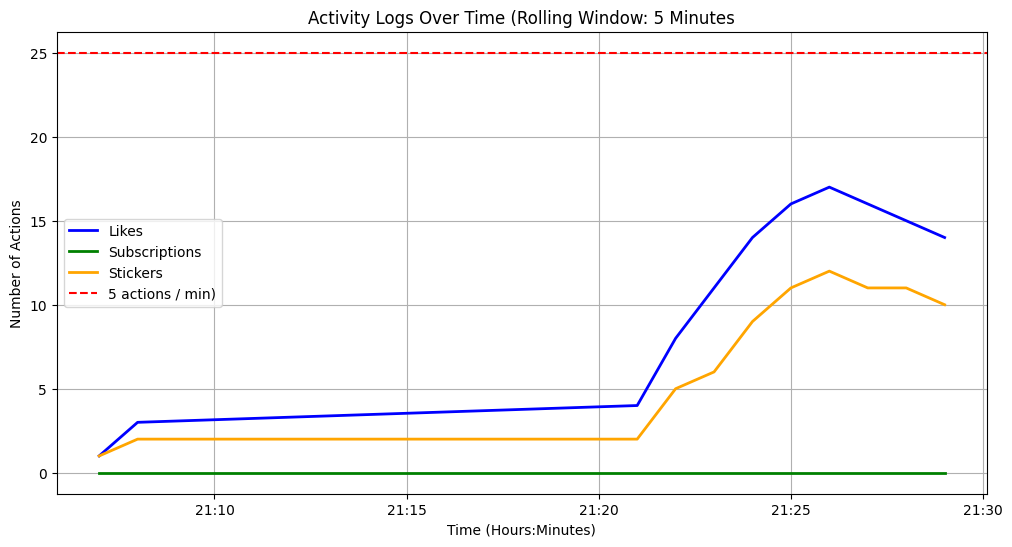

In [ ]:
"""
Запуск бота в цикле 
Бот будет просматривать ленту рекомендаций и подписок поочередно
"""

N = 500 # сколько клипов смотрится в каждом цикле
skip_ratio = 0.5 # вероятность пропуска клипа
subscribe_ratio = 0.75 # вероятность подписки на канал
pause = .5 # пауза между клипами
# modes = [ 'rec', 'subs',]
modes = [ 'subs',]


nuum = NuumActions(browser)
nuum.driver.implicitly_wait(2)
c = 0
log = pd.DataFrame(columns=['name', 'like', 'sticker', 'subscribe', 'mode', 'time'])
while True:
    c += 1
    for mode in modes:
        try:            
            print(f'Start {mode}')
            rnd_sleep(3)
            run_bot(nuum, N, skip_ratio, mode=mode, log=log, c=c, subscribe_ratio=subscribe_ratio, pause=pause)
            print()
            
        except Exception as e:
            print(e)
            rnd_sleep(5)
    

### Отключенbе уведомлений

In [6]:
nuum.turn_off_notifications()